In [26]:
import seaborn as sns
import pandas as pd
from IPython.display import display 

# Charger le dataset Titanic
df = sns.load_dataset('titanic')

# Afficher les premières lignes
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:


# Informations générales
print(" montre les types de colonnes et les valeurs manquantes :")
df.info()

# Statistiques des colonnes numériques
print("statistiques des colonnes numériques :")
print(df.describe())

: montre les types de colonnes et les valeurs manquantes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
statistiques des colon

In [3]:
print(" Valeurs manquantes par colonne :")
print(df.isnull().sum())
print("nTypes de données :")
print(df.dtypes)



 Valeurs manquantes par colonne :
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
nTypes de données :
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


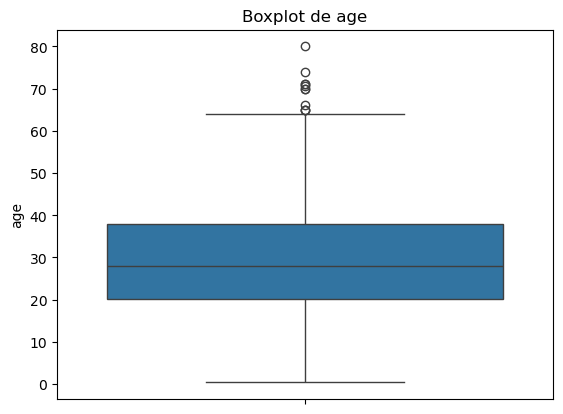

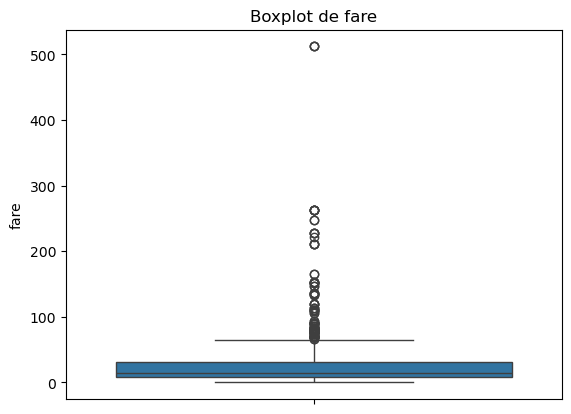

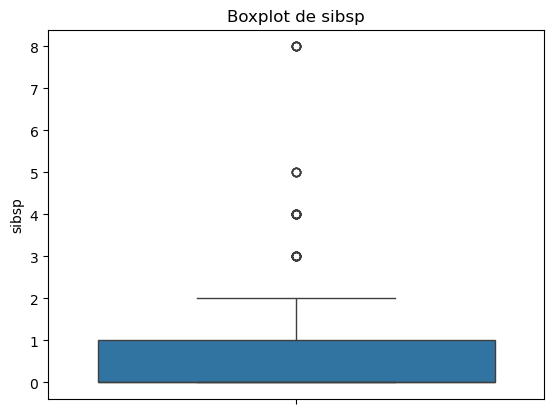

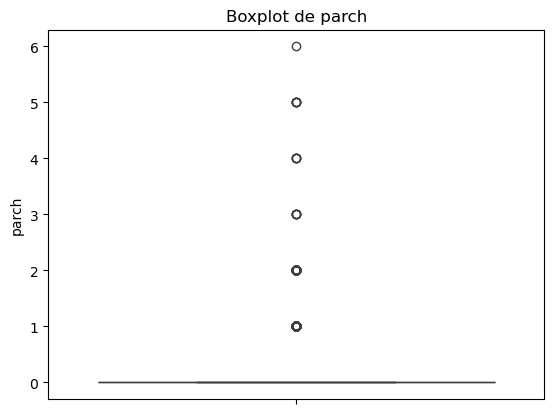

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['age', 'fare', 'sibsp', 'parch']

for col in numerical_features:
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


In [7]:
import numpy as np
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['age'] < Q1 - 1.5*IQR) | (df['age'] > Q3 + 1.5*IQR)]
print(outliers)

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
33          0       2  male  66.0      0      0  10.5000        S  Second   
54          0       1  male  65.0      0      1  61.9792        C   First   
96          0       1  male  71.0      0      0  34.6542        C   First   
116         0       3  male  70.5      0      0   7.7500        Q   Third   
280         0       3  male  65.0      0      0   7.7500        Q   Third   
456         0       1  male  65.0      0      0  26.5500        S   First   
493         0       1  male  71.0      0      0  49.5042        C   First   
630         1       1  male  80.0      0      0  30.0000        S   First   
672         0       2  male  70.0      0      0  10.5000        S  Second   
745         0       1  male  70.0      1      1  71.0000        S   First   
851         0       3  male  74.0      0      0   7.7750        S   Third   

     who  adult_male deck  embark_town alive  alone  
33   man        True 

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} outliers: {len(outliers)}")


survived outliers: 0
pclass outliers: 0
age outliers: 11
sibsp outliers: 46
parch outliers: 213
fare outliers: 116


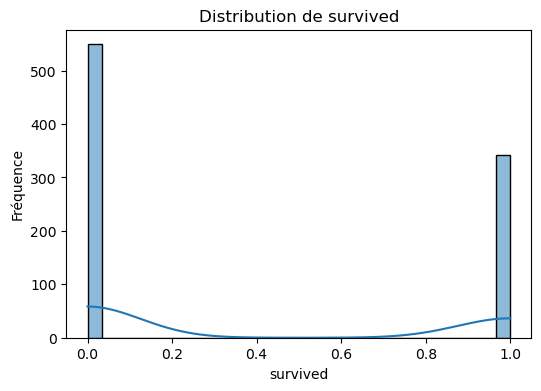

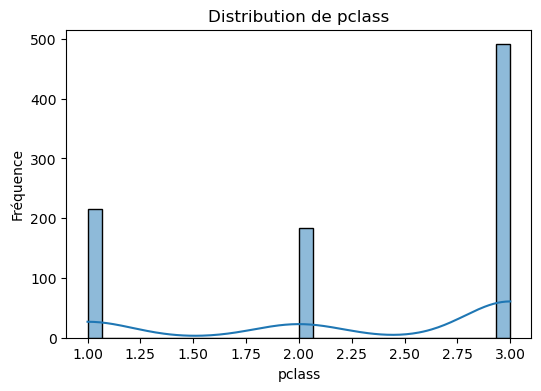

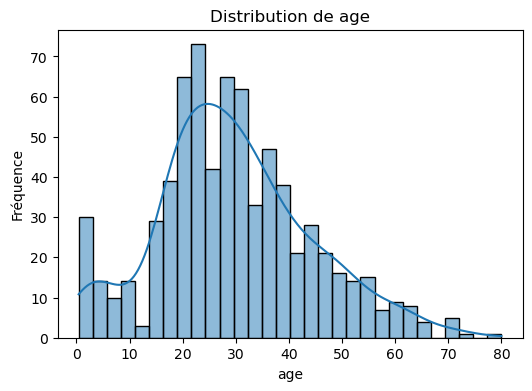

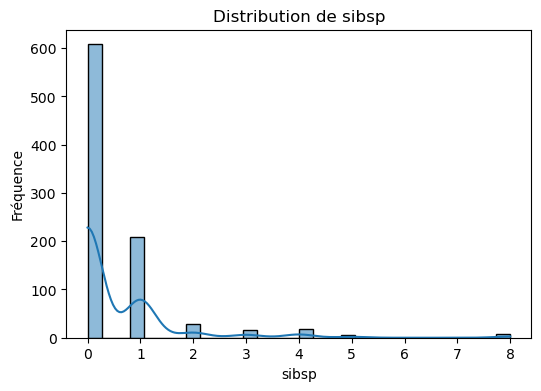

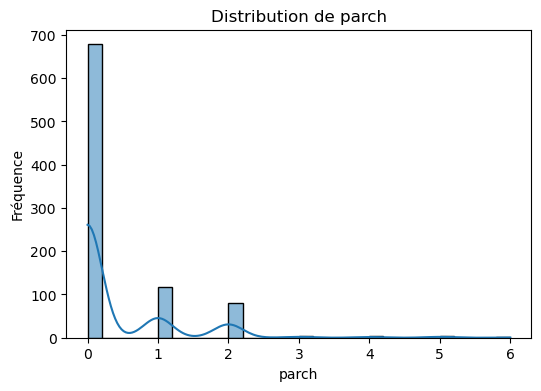

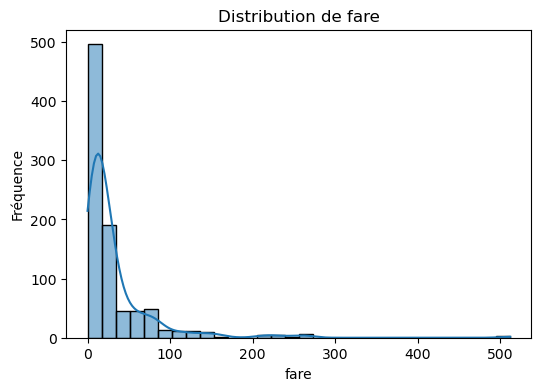

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colonnes numériques
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)  # Histogramme avec courbe KDE
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

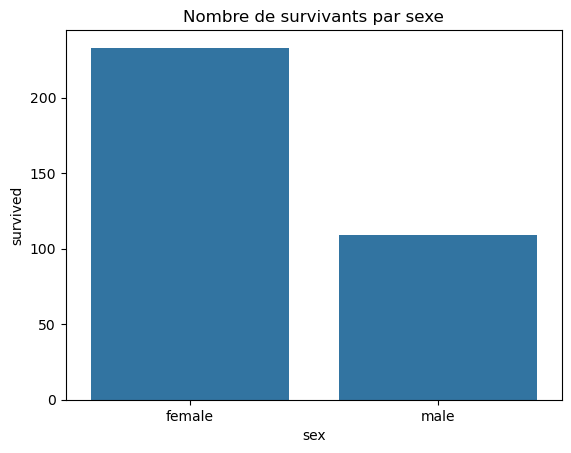

In [10]:
survived_counts = df.groupby('sex')['survived'].sum().reset_index()
# 'survived' = 1 si survivant, 0 sinon → sum = nombre de survivants

sns.barplot(x='sex', y='survived', data=survived_counts)
plt.title('Nombre de survivants par sexe')
plt.show()


Corrélation des variables numériques avec 'survived' :
survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.077221
pclass     -0.338481
Name: survived, dtype: float64


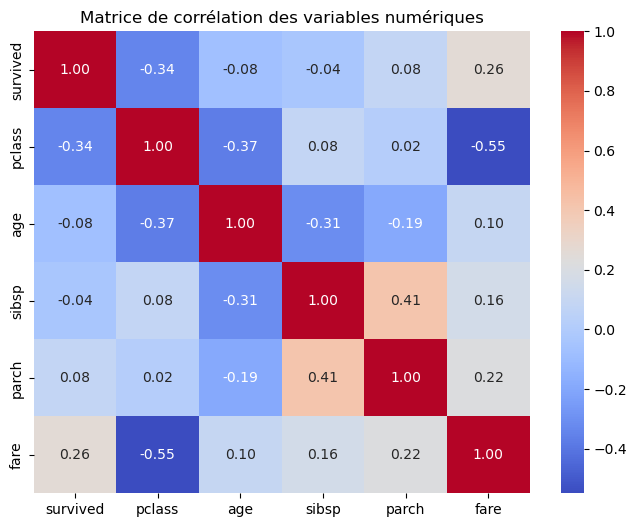

In [11]:
# Sélection des colonnes numériques
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Matrice de corrélation
corr_matrix = df[numerical_features].corr()

# Corrélation de chaque variable avec 'survived'
corr_target = corr_matrix['survived'].sort_values(ascending=False)
print("\nCorrélation des variables numériques avec 'survived' :")
print(corr_target)

# Heatmap pour visualiser la corrélation
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation des variables numériques")
plt.show()


Taux de survie moyen par catégorie de sex :
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


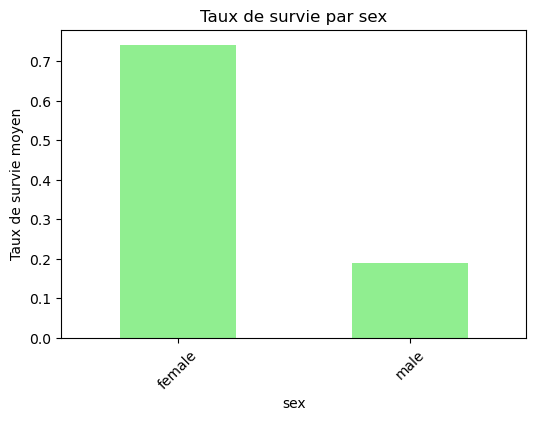


Taux de survie moyen par catégorie de embarked :
embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


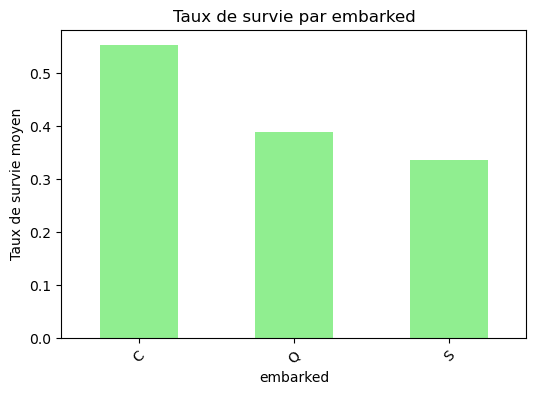


Taux de survie moyen par catégorie de class :
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_12700\612799251.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_survived = df.groupby(col)['survived'].mean().sort_values(ascending=False)


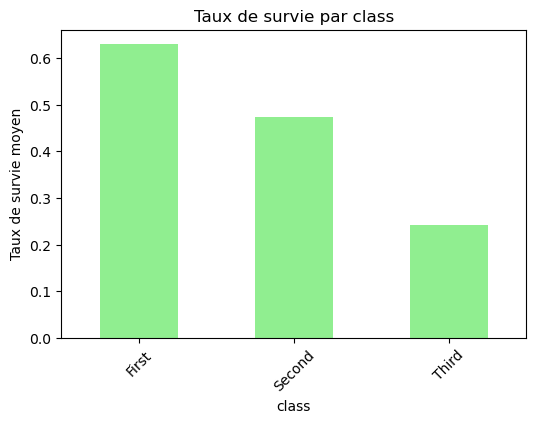


Taux de survie moyen par catégorie de who :
who
woman    0.756458
child    0.590361
man      0.163873
Name: survived, dtype: float64


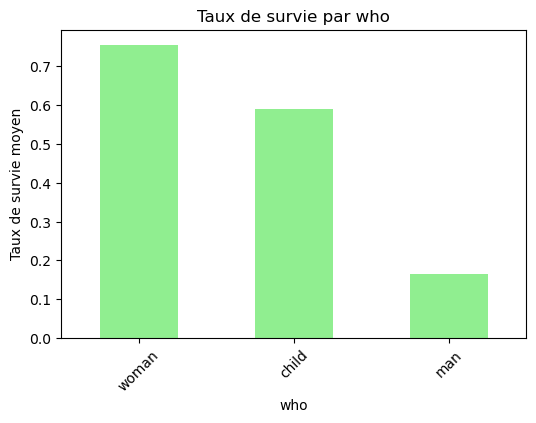


Taux de survie moyen par catégorie de deck :
deck
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
Name: survived, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_12700\612799251.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_survived = df.groupby(col)['survived'].mean().sort_values(ascending=False)


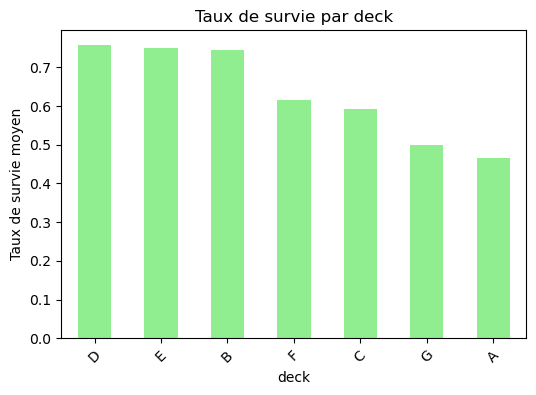


Taux de survie moyen par catégorie de embark_town :
embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: survived, dtype: float64


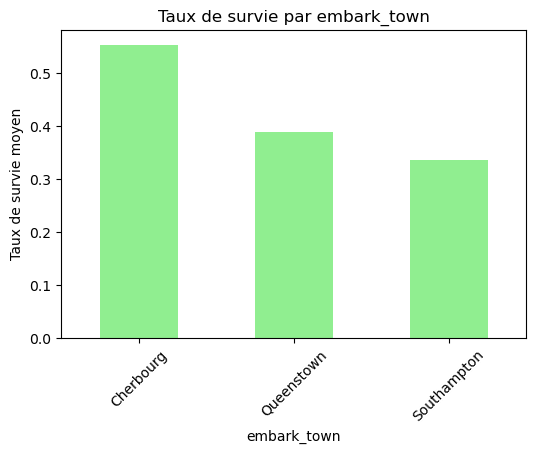


Taux de survie moyen par catégorie de alive :
alive
yes    1.0
no     0.0
Name: survived, dtype: float64


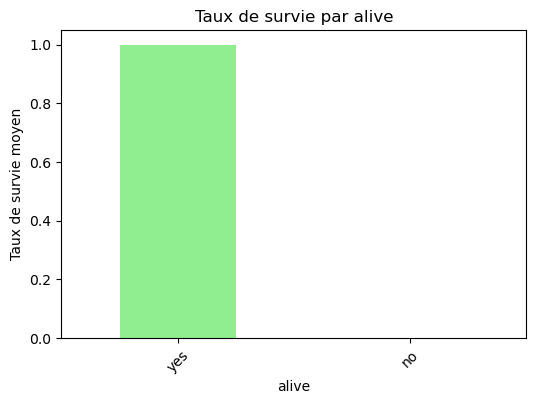

In [12]:
# Colonnes catégorielles
categorical_features = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_features:
    # Taux moyen de survie par catégorie
    mean_survived = df.groupby(col)['survived'].mean().sort_values(ascending=False)
    print(f"\nTaux de survie moyen par catégorie de {col} :")
    print(mean_survived)

    # Visualisation en barplot
    plt.figure(figsize=(6,4))
    mean_survived.plot(kind='bar', color='lightgreen')
    plt.title(f"Taux de survie par {col}")
    plt.ylabel("Taux de survie moyen")
    plt.xticks(rotation=45)
    plt.show()

In [10]:
#affiche où il y a les missing values
display(df.isnull().sum())

print("en remareque :il y a 4 colones ont des missing values ,danc en faire le handling sur ces 4 colone en aplique a chaqu'une la bonne methede")

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

en remareque :il y a 4 colones ont des missing values


In [94]:
# Remplacer les NaN pour (age) par la médiane
df_handling = df.copy()
# Remplacer les NaN pour 'age' par la médiane
df_handling['age'] = df_handling['age'].fillna(df_handling['age'].median())

# Remplacer les NaN pour 'embarked' par la valeur la plus fréquente
df_handling['embarked'] = df_handling['embarked'].fillna(df_handling['embarked'].mode()[0])

# Supprimer la colonne 'deck' car trop de valeurs manquantes
#en supprime toute la  colone car a boucoup de  valeur monquante
df_handling.drop('deck', axis=1, inplace=True, errors='ignore')
display(df_handling)
print("la longeure de df est:",len(df),"\n la longeure de df_handling est",len(df_handling))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


la longeure de df est: 891 
 la longeure de df_handling est 891


In [95]:
#detecter duplicate rowr 
display(df_handling.duplicated())  
#retourene series bouliene  si duplicate metre TRUE sinon FALS  avec toujoure 1ere ligne ne compte pas comme duplicate
#filtre les ligne où il y a duplicate 
duplicate_row=df_handling[df_handling.duplicated()]
print(duplicate_row.head(11))

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
47          1       3  female  28.0      0      0   7.7500        Q   Third   
55          1       1    male  28.0      0      0  35.5000        S   First   
76          0       3    male  28.0      0      0   7.8958        S   Third   
77          0       3    male  28.0      0      0   8.0500        S   Third   
87          0       3    male  28.0      0      0   8.0500        S   Third   
95          0       3    male  28.0      0      0   8.0500        S   Third   
101         0       3    male  28.0      0      0   7.8958        S   Third   
105         0       3    male  28.0      0      0   7.8958        S   Third   
121         0       3    male  28.0      0      0   8.0500        S   Third   
133         1       2  female  29.0      1      0  26.0000        S  Second   
173         0       3    male  21.0      0      0   7.9250        S   Third   

       who  adult_male  embark_town alive  alone  


In [96]:
#nombre deligne dupliqueees
display("Nombre de lignes dupliquées :", df_handling.duplicated().sum())


'Nombre de lignes dupliquées :'

np.int64(116)

In [97]:
# Supprimer les duplicates
df_handling =  df_handling.drop_duplicates()
# Vérifier à nouveau
display("Nombre de lignes après suppression des doublons :",  df_handling.shape[0])

'Nombre de lignes après suppression des doublons :'

775

In [98]:
#2-3
#supprimer les colonnes inutiles ou redondantes
#'alive' indique directement si la personne a survécu 
#Garder cette colonne biaiserait le modèle, car il “voit” déjà la réponse ,Si je la gardes, le modèle tricherait
#colone embark_town et embarked  sont identique 
#la colone 'deck'  supprimer car a plusieure valeure manquantes  ona deja suppremer
#supprimer 'who' car avec l'age et sex en peut conclure esque enfant, male, 
#en regarede les detaille ave ces fonction df.info() ,df.nunique()
#supprimer les colone inutille 
print(df_handling)
df_handling.drop(['embark_town', 'alive', 'who'], axis=1, inplace=True)


     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0           0       3    male  22.0      1      0   7.2500        S  Third   
1           1       1  female  38.0      1      0  71.2833        C  First   
2           1       3  female  26.0      0      0   7.9250        S  Third   
3           1       1  female  35.0      1      0  53.1000        S  First   
4           0       3    male  35.0      0      0   8.0500        S  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
887         1       1  female  19.0      0      0  30.0000        S  First   
888         0       3  female  28.0      1      2  23.4500        S  Third   
889         1       1    male  26.0      0      0  30.0000        C  First   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  adult_male  embark_town alive  alone  
0      man  

In [100]:
dp =df.copy()
# FamilySize : taille de la famille
dp['FamilySize'] = dp['sibsp'] + dp['parch'] + 1
# IsAlone : True si la personne est seule
dp['IsAlone'] = (dp['FamilySize'] == 1)
#Créer un « titre » basé sur la colonne who
dp['Title'] = dp['who'].map({
    'man': 'Mr',
    'woman': 'Mrs',
    'child': 'Master'
})
# Supprimer les colonnes inutiles
# on suprime sibsp et parch car elles sont remplacer par familysize donc no utils
dp = dp.drop(columns=[ 'sibsp', 'parch'])
print(dp.head(5))

   survived  pclass     sex   age     fare embarked  class    who  adult_male  \
0         0       3    male  22.0   7.2500        S  Third    man        True   
1         1       1  female  38.0  71.2833        C  First  woman       False   
2         1       3  female  26.0   7.9250        S  Third  woman       False   
3         1       1  female  35.0  53.1000        S  First  woman       False   
4         0       3    male  35.0   8.0500        S  Third    man        True   

  deck  embark_town alive  alone  FamilySize  IsAlone Title  
0  NaN  Southampton    no  False           2    False    Mr  
1    C    Cherbourg   yes  False           2    False   Mrs  
2  NaN  Southampton   yes   True           1     True   Mrs  
3    C  Southampton   yes  False           2    False   Mrs  
4  NaN  Southampton    no   True           1     True    Mr  


In [101]:
import pandas as pd
from IPython.display import display
#tanquant j'ai pas la colonne name dans mon data frame j'ai pris ce exemple pour expliquer l'utilite de str.extract
# Petit DataFrame exemple
data = {
    'name': [
        'Braund, Mr. Owen Harris',
        'Cumings, Mrs. John Bradley',
        'Heikkinen, Miss. Laina',
        'Futrelle, Mrs. Jacques Heath',
        'Allen, Mr. William Henry'
    ]
}

dr = pd.DataFrame(data)

# Extraire le titre avec fonction de pandas qui permet de trouver et extraire du texte grâce à une expression régulière (REGEX) str.extract et expand =fales pour retourner juste une colonne et pas tout le data frame (true)
dr['Title'] = dr['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Afficher le résultat
display(dr)

,name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath",Mrs
4,"Allen, Mr. William Henry",Mr


In [102]:
# -----------------------------
#Importer les bibliothèques
# -----------------------------
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from IPython.display import display

ds = df_handling.copy()


# Ordinal Encoding pour 'class' (ordre Third < Second < First)
if 'class' in ds.columns:
    # convertir en string pour éviter les erreurs
    ds['class'] = ds['class'].astype(str)
    oe_class = OrdinalEncoder(categories=[['Third', 'Second', 'First']])
    ds[['class']] = oe_class.fit_transform(ds[['class']])

# Label Encoding pour 'sex'
if 'sex' in ds.columns:
    le_sex = LabelEncoder()
    ds['sex'] = le_sex.fit_transform(ds['sex'])  # female=0, male=1

# One-Hot Encoding pour 'embarked'
if 'embarked' in df.columns:
   ds = pd.get_dummies(ds, columns=['embarked'], drop_first=True)


#cols_to_drop = ['who', 'embark_town', 'alive', 'deck']  # deck est déjà supprimé
#existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
#df.drop(existing_cols_to_drop, axis=1, inplace=True)

#  Vérification finale

print(" Dataset prêt pour le modèle :")
display(ds.head())

print("\n Types de colonnes après encodage :")
print(ds.dtypes)


#  Vérification des valeurs manquantes

print("\n Valeurs manquantes par colonne :")
print(ds.isnull().sum())


🔹 Dataset prêt pour le modèle :


,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,alone,embarked_Q,embarked_S
0,0,3,1,22.0,1,0,7.2500,0.0,True,False,False,True
1,1,1,0,38.0,1,0,71.2833,2.0,False,False,False,False
2,1,3,0,26.0,0,0,7.9250,0.0,False,True,False,True
3,1,1,0,35.0,1,0,53.1000,2.0,False,False,False,True
4,0,3,1,35.0,0,0,8.0500,0.0,True,True,False,True



🔹 Types de colonnes après encodage :
survived        int64
pclass          int64
sex             int64
age           float64
sibsp           int64
parch           int64
fare          float64
class         float64
adult_male       bool
alone            bool
embarked_Q       bool
embarked_S       bool
dtype: object

🔹 Valeurs manquantes par colonne :
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
class         0
adult_male    0
alone         0
embarked_Q    0
embarked_S    0
dtype: int64


In [77]:
#Detect outliers IQR (Interquartile Range)
# Pour chaque colonne numérique : age, fare, sibsp, parch On calcule Q1 (25%), Q3 (75%) et IQR
num_cols = ['age', 'fare', 'sibsp', 'parch']
df_clean = df_handling.copy()  # créer une copie pour supprimer les outliers
#crier pour stoquer les borne 
iqr_bounds = {}
for col in num_cols:
    Q1 = df_handling[col].quantile(0.25)  # 25ème percentile
    Q3 = df_handling[col].quantile(0.75)  # 75ème percentile
    IQR = Q3 - Q1                # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Lower = {lower_bound}, Upper = {upper_bound}")
    
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"Nombre d'outliers pour {col} : {len(outliers)}")
    # Supprimer les outliers pour cette colonne
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
display(outliers)
display(df_clean)

age: Lower = 2.5, Upper = 54.5
Nombre d'outliers pour age : 66
fare: Lower = -26.724, Upper = 65.6344
Nombre d'outliers pour fare : 104
sibsp: Lower = -1.5, Upper = 2.5
Nombre d'outliers pour sibsp : 29
parch: Lower = 0.0, Upper = 0.0
Nombre d'outliers pour parch : 115


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,alone
8,1,3,female,27.0,0,2,11.1333,S,Third,False,False
10,1,3,female,4.0,1,1,16.7000,S,Third,False,False
13,0,3,male,39.0,1,5,31.2750,S,Third,True,False
25,1,3,female,38.0,1,5,31.3875,S,Third,False,False
43,1,2,female,3.0,1,2,41.5792,C,Second,False,False
...,...,...,...,...,...,...,...,...,...,...,...
869,1,3,male,4.0,1,1,11.1333,S,Third,False,False
871,1,1,female,47.0,1,1,52.5542,S,First,False,False
880,1,2,female,25.0,0,1,26.0000,S,Second,False,False
885,0,3,female,39.0,0,5,29.1250,Q,Third,False,False


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,True
5,0,3,male,28.0,0,0,8.4583,Q,Third,True,True
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,True,True
886,0,2,male,27.0,0,0,13.0000,S,Second,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,False,True
889,1,1,male,26.0,0,0,30.0000,C,First,True,True


In [103]:
from scipy.stats import zscore
#Detect outliers Z(Interquartile Range)
#Le Z-score mesure combien d’écarts-types une valeur est éloignée de la moyenne.
dfzscor=df_handling.copy()  # ton dataframe de travail
num_cols = ['age', 'fare', 'sibsp', 'parch']
# Calcul du Z-score pour toutes les colonnes numériques
dfzscor=zscore(dfzscor[num_cols])
print(z_scores)

[[-0.56573646 -0.50244517  0.43279337 -0.47367361]
 [ 0.66386103  0.78684529  0.43279337 -0.47367361]
 [-0.25833709 -0.48885426 -0.4745452  -0.47367361]
 ...
 [-0.1046374  -0.17626324  0.43279337  2.00893337]
 [-0.25833709 -0.04438104 -0.4745452  -0.47367361]
 [ 0.20276197 -0.49237783 -0.4745452  -0.47367361]]


In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from IPython.display import display
df_scaling = df_handling.copy()
num_cols = ['age', 'fare']
for col in ['age', 'fare']:
    if col in df_scaling.columns:
        # Log transformation (ajouter 1 pour éviter log(0))
        df_scaling[col] = np.log1p(df_scaling[col])

# -----------------------------
#  Scaling des variables numériques
# -----------------------------
scaler = StandardScaler()
df_scaling[num_cols] = scaler.fit_transform(df_scaling[num_cols])
print("🔹 Dataset prêt pour le modèle :")
display(df_scaling.head())

print("\n🔹 Types de colonnes après traitement :")
print(df_scaling.dtypes)

print("\n🔹 Valeurs manquantes par colonne :")
print(df_scaling.isnull().sum())

🔹 Dataset prêt pour le modèle :


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,alone
0,0,3,male,-0.211616,1,0,-0.973913,S,Third,True,False
1,1,1,female,0.604831,1,0,1.282761,C,First,False,False
2,1,3,female,0.036290,0,0,-0.892143,S,Third,False,True
3,1,1,female,0.481077,1,0,0.981481,S,First,False,False
4,0,3,male,0.481077,0,0,-0.877681,S,Third,True,True



🔹 Types de colonnes après traitement :
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class         category
adult_male        bool
alone             bool
dtype: object

🔹 Valeurs manquantes par colonne :
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
adult_male    0
alone         0
dtype: int64


In [107]:
from sklearn.model_selection import train_test_split

# Séparer les features et la cible
X = ds.drop('survived', axis=1)  # toutes les colonnes sauf la cible
y = ds['survived']               # la cible

# Split stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% pour le test
    random_state=42,      # pour reproduire les résultats
    stratify=y            # pour conserver la proportion des classes
)

print(f"Taille train: {X_train.shape}, Taille test: {X_test.shape}")

Taille train: (620, 11), Taille test: (155, 11)


In [108]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le modèle
knn = KNeighborsClassifier(n_neighbors=5)
# Entraîner le modèle sur les données d'entraînement
knn.fit(X_train, y_train)

# Prédire sur le jeu de test
y_pred_knn = knn.predict(X_test)

# Évaluer la performance
print("🔹 K-Nearest Neighbors (K=5) 🔹")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nClassification report:")
print(classification_report(y_test, y_pred_knn))

🔹 K-Nearest Neighbors (K=5) 🔹
Accuracy: 0.7032

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73        91
           1       0.62      0.73      0.67        64

    accuracy                           0.70       155
   macro avg       0.70      0.71      0.70       155
weighted avg       0.72      0.70      0.71       155



In [109]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialiser le modèle
lr = LogisticRegression(max_iter=500, random_state=42)

# Entraîner le modèle sur les données d'entraînement
lr.fit(X_train, y_train)

# Prédire sur le jeu de test
y_pred_lr = lr.predict(X_test)

# Évaluer la performance
print("🔹 Logistic Regression 🔹")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification report:")
print(classification_report(y_test, y_pred_lr))

🔹 Logistic Regression 🔹
Accuracy: 0.7935

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        91
           1       0.76      0.73      0.75        64

    accuracy                           0.79       155
   macro avg       0.79      0.78      0.79       155
weighted avg       0.79      0.79      0.79       155




🔹 Évaluation pour KNN (k=5) 🔹
Accuracy: 0.7032
Confusion Matrix:
[[62 29]
 [17 47]]


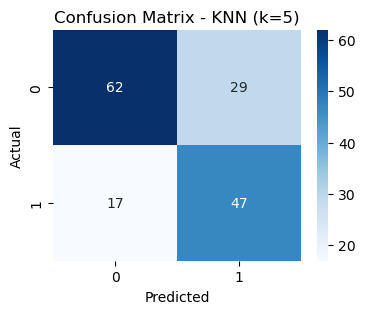

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.68      0.73        91
           1       0.62      0.73      0.67        64

    accuracy                           0.70       155
   macro avg       0.70      0.71      0.70       155
weighted avg       0.72      0.70      0.71       155


🔹 Évaluation pour Logistic Regression 🔹
Accuracy: 0.7935
Confusion Matrix:
[[76 15]
 [17 47]]


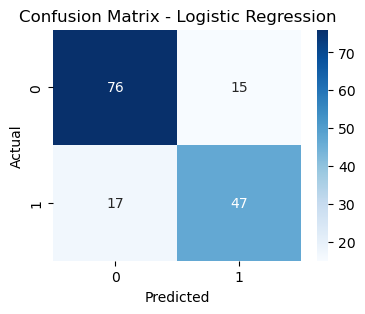

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        91
           1       0.76      0.73      0.75        64

    accuracy                           0.79       155
   macro avg       0.79      0.78      0.79       155
weighted avg       0.79      0.79      0.79       155



In [110]:
#Evaluate performance on the test set
#en utilise Accuracy,Confusion Matrix,
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des modèles
models = {
    "KNN (k=5)": knn,
    "Logistic Regression": lr
}

for name, model in models.items():
    print(f"\n🔹 Évaluation pour {name} 🔹")
    
    # Prédiction sur le test set
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Visualisation de la matrice
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
